# Principal Component Analysis (PCA)

Principal component analysis (PCA), is a technique that is commonly discussed under dimensionality reduction title. However, inspecting more closely, it is actually a transformation on the axes of the data. This transformation has a way of ordering data variance in that axis. The more variance an axis has, the more it will contribute to the final features of the existing data. If it is desired to represent the data in a lower dimensional space, it is wiser to keep the axes with the higher variances and it that case PCA can be a useful tool to achieve this. Thus, although it gives a good measure of keeping the most of the information while reducing the data dimension, it is better to see it as a usefeul method the aid the dimensionality reduction rather than the dimensionality reduction itself. Now let's discuss the method and its derivation.

Assume we have an $n\times k$ data matrix $\mathbf{X}$ where $k$ is the feature size and $n$ is the number of samples. Further assume that the features of $\mathbf{X}$ are zero mean (if they are not, we can always substract column means from each column). We want to find a linear tranformation $\mathbf{Z}=\mathbf{X}\mathbf{W}$, with $\mathbf{W}$ having dimensions $k\times k^\prime$ and $k \leq k^\prime$. The transformation should satisfy the optimization problem;

$$
\max_{\mathbf{W}} \quad \text{tr}\left( \text{Cov}(\mathbf{Z}) \right), \quad  \mathbf{W}^T\mathbf{W}=\mathbf{I}_{k^\prime}
$$

Hence, we want the individual feature variances in the transformed space to have maximum total variance, and the orthonormality of the matrix $\mathbf{W}$. Now let's expand the covariance expression a little;

$$
\text{Cov}(\mathbf{Z}) = \frac{1}{n} \mathbf{Z}^T \mathbf{Z} = \frac{1}{n} \left( \mathbf{X}\mathbf{W}\right)^T  \left( \mathbf{X}\mathbf{W}\right) = \mathbf{W}^T \underbrace{\left( \frac{1}{n} \mathbf{X}^T \mathbf{X} \right)}_{\Sigma_\mathbf{X} = \text{Cov}(\mathbf{X})} \mathbf{W}
$$

Then the optimization problem turns into;

$$
\max_{ \mathbf{W}^T\mathbf{W}=\mathbf{I}_{k^\prime}} \quad \text{tr}\left( \mathbf{W}^T \Sigma_\mathbf{X} \mathbf{W} \right)
$$

The diagonals of the term in trace operation are all positive since $\Sigma_\mathbf{X}$ is a covariance matrix and matrix $\mathbf{W}$ is unitary. This means that maximizing the above expression is equivalant to maximizing individual diagonal elements of $\mathbf{W}^T \Sigma_\mathbf{X} \mathbf{W}$. Taking the $p^\text{th}$ column in matrix $\mathbf{W}$ as $\mathbf{w}_p$, this is equivalent to;

$$
\max_{ \mathbf{w}_p^T\mathbf{w}_p=1} \quad  \mathbf{w}_p^T \Sigma_\mathbf{X} \mathbf{w}_p
$$

This is a Lagrange multiplier problem that can be written as;

 $$
 J=\mathbf{w}_p^T \Sigma_\mathbf{X} \mathbf{w}_p + \lambda_p (1-\mathbf{w}_p^T\mathbf{w}_p)
 $$

Differentiating w.r.t. $\mathbf{w}_p$, we get,

$$
\frac{\partial J}{\partial \mathbf{w}_p} = 2 \left( \Sigma_\mathbf{X} \mathbf{w}_p - \lambda_p \mathbf{w}_p \right) = 0, \quad ⇒ \quad
\Sigma_\mathbf{X} \mathbf{w}_p = \lambda_p \mathbf{w}_p
$$

The last equation is an eigenvalue equation. Thus, the $p^\text{th}$ optimal vector is the $p^\text{th}$ eigenvector of $\Sigma_\mathbf{X}$ with eigenvalue $\lambda_p$.

If we turn back to our original problem, for preserving maximum variance with matrix $\mathbf{W}$ having $k^\prime$ columns, we should take the $k^\prime$ eigenvectors of $\Sigma_\mathbf{X}$ with largest eigenvalues.

# What if $\mathbf{X}$ is not centered?

Instead of assuming $\mathbf{X}$ is centered to be zero mean in advance, let's define a more general problem with an additinal vector parameter $\mu$ with size $k$ (the feature size of $\mathbf{X}$). Thus, now we are looking for a modified transformation $\mathbf{Z}=\left(\mathbf{X}- \mathbf{1} \mu^T\right)\mathbf{W}$, then;

$$
\max_{\mu, \,\, \mathbf{W}^T\mathbf{W}=\mathbf{I}_{k^\prime}} \quad \text{tr}\left( \mathbf{W}^T \left( \frac{1}{n} \left(\mathbf{X}- \mathbf{1} \mu^T\right)^T \left(\mathbf{X}- \mathbf{1} \mu^T\right) \right) \mathbf{W} \right)
$$

Let's isolate the inner term in the trace and maximize it for $\mu$;

$$
\max_{\mu} \quad \text{tr}\left(  \frac{1}{n} \left(\mathbf{X}- \mathbf{1} \mu^T\right)^T \left(\mathbf{X}- \mathbf{1} \mu^T\right)   \right)
$$

Assuming $\mathbf{x}_i$ is the $i^\text{th}$ row of $\mathbf{X}$, this is equivalent to;

$$
\max_{\mu} \quad \frac{1}{n} \sum_{i=1}^n \| \mathbf{x}_i - \mu \| ^2
$$

which is maximized for $\mu=\frac{1}{n} \sum_{i=1}^n  \mathbf{x}_i$. Thus, the zero mean centering is a natural result of the maximization in this case.

Let's now officially define the steps for PCA and how it is used for dimensionality reduction. Again assume an $n\times k$ data matrix $\mathbf{X}$ with $n$ the sample size and $k$ the number of features.

* Compute the feature mean vector and subtract it from each row of $\mathbf{X}$, hence the columns will have zero mean. Call the new centered matrix $\mathbf{X}_{\text{cen}}$.
* Compute the empirical covariance matrix $ \Sigma_\mathbf{X}=\frac{1}{n} \mathbf{X}_{\text{cen}}^T \mathbf{X}_{\text{cen}} $ .
* Calculate the eigenvectors and eigenvalues of $ \Sigma_\mathbf{X}$. Normalize the eigenvectors such that they will have unit length (this is important because we want the transformation only to rotate the axes and not to scale them).
* Order the eigenvalues such that $\lambda_1 > \lambda_2 > \dots \lambda_{k^\prime}$ for $k^\prime \leq k$. Note that all the eigenvalues will be positive since the covariance matrix $ \Sigma_\mathbf{X}$ is positive definite.
* Create the transformation matrix
  $$
    \mathbf{W} = \left[e_1 \,\, e_2 \cdots e_{k^\prime} \right]
  $$
  where $e_1, e_2 \cdots e_{k^\prime}$ are the unit length eigenvectors.
* Calculate the axes-rotated and dimension reduced $n\times {k^\prime}$ matrix $\mathbf{X}_{\text{PCA}}$ as;
  $$
  \mathbf{X}_{\text{PCA}} = \mathbf{X}_{\text{cen}} \mathbf{W}
  $$

Note that we also allowed the case of $k^\prime = k$, in which case the axes will be rotated in a way that an arbitrary axis will have the maximum possible variance for the dimensions including itself and the ones coming after it. However, the total variance will be the same and the dimensions not reduced.


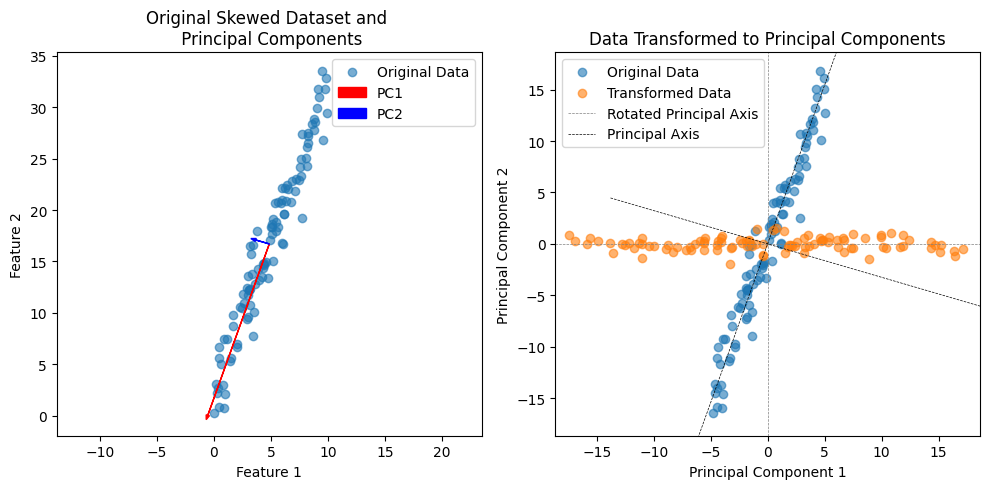

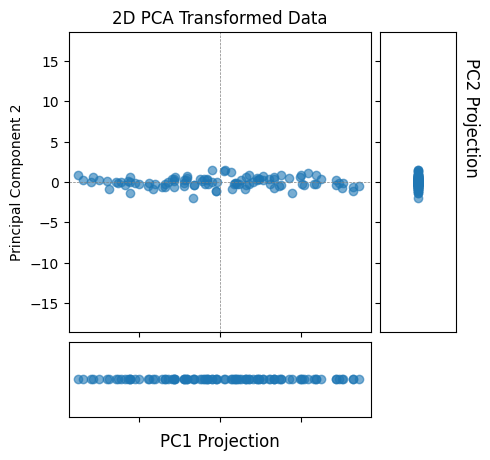

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Generate a skewed dataset
np.random.seed(10)
n_samples = 100
x1 = np.random.uniform(0, 10, n_samples)
x2 = 3 * x1 + 2 + np.random.normal(0, 2, n_samples)  # Skewed relation
X = np.vstack((x1, x2)).T  # Shape (100,2)

max_scale = max(max(x1)-min(x1),
                max(x2)-min(x2))

# Compute mean
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean  # Centering the data

# Compute covariance matrix
cov_matrix = np.cov(X_centered.T)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues (descending order)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Transform data to the new principal component space
X_pca = X_centered @ eigenvectors



# Plot the results

# Define the min and max limits to show the variances better
diff = max_scale/2+2
x_min, x_max = X_mean[0]-diff, X_mean[0]+diff
y_min, y_max = X_mean[1]-diff, X_mean[1]+diff

fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # One row, three plots

# Plot original dataset
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.6, label="Original Data")
for i in range(2):
    scale = np.sqrt(np.abs(eigenvalues[i])) * 2
    ax[0].arrow(X_mean[0], X_mean[1], eigenvectors[i, 0] *  scale, eigenvectors[i, 1] *  scale,
              color='red' if i == 0 else 'blue', head_width=0.3, label=f"PC{i+1}")
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[0].set_xlim([x_min,x_max])
ax[0].set_ylim([y_min,y_max])
ax[0].set_title("Original Skewed Dataset and \n Principal Components")
ax[0].legend()


# Plot transformed dataset
ax[1].scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.6, label="Original Data")
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, label="Transformed Data")
ax[1].set_xlabel("Principal Component 1")
ax[1].set_ylabel("Principal Component 2")
ax[1].set_title("Data Transformed to Principal Components")
ax[1].axhline(0, color='gray', linestyle='--', linewidth=0.5, label="Rotated Principal Axis")
ax[1].axvline(0, color='gray', linestyle='--', linewidth=0.5)
for i in range(2):
    x_array = np.array([x_min,x_max])
    y_array = eigenvectors[i, 1]/eigenvectors[i, 0]*x_array
    ax[1].plot(x_array, y_array, color='black', linestyle='--', linewidth=0.5, label="Principal Axis" if i==0 else None)
ax[1].set_xlim([-diff,diff])
ax[1].set_ylim([-diff,diff])
ax[1].legend()


plt.tight_layout()
plt.show()



# GridSpec for custom layout
fig = plt.figure(figsize=(5, 5))
gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[4, 1],
              wspace=0.05, hspace=0.05)

# Main PCA scatter plot
ax_main = fig.add_subplot(gs[0, 0])
ax_main.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
ax_main.set_xlabel("Principal Component 1")
ax_main.set_ylabel("Principal Component 2")
ax_main.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax_main.axvline(0, color='gray', linestyle='--', linewidth=0.5)
ax_main.set_title("2D PCA Transformed Data")
ax_main.set_xlim([-diff,diff])
ax_main.set_ylim([-diff,diff])

# PC1-only projection (bottom)
ax_bottom = fig.add_subplot(gs[1, 0], sharex=ax_main)
ax_bottom.scatter(X_pca[:, 0], np.zeros_like(X_pca[:, 0]), alpha=0.6)
ax_bottom.set_yticks([])
ax_bottom.set_title("PC1 Projection", y=-0.5)
plt.setp(ax_bottom.get_xticklabels(), visible=False)

# PC2-only projection (right)
ax_right = fig.add_subplot(gs[0, 1], sharey=ax_main)
ax_right.scatter(np.zeros_like(X_pca[:, 1]), X_pca[:, 1], alpha=0.6)
ax_right.set_xticks([])
ax_right.set_title("PC2 Projection", rotation=-90, x=1.2, y=0.5)
plt.setp(ax_right.get_yticklabels(), visible=False)

plt.show()

A visual 2D example is given above on how PCA works. In the first plot, we see a data where spread in one angle is predominantly larger than the rest. When PCA is applied, it automatically find the direction of this widest spread which is the direction of the covariance eigenvector with the larger eigenvalue, and the direction orthogonal to it corresponds to the eigenvector with smaller eigenvalue. If we had more than 2 dimensions, it would find the remaining highest spread direction at each step and all these directions would be orthogonal to each other (since we define the transformation matrix $\mathbf{W}$ to be unitary at the problem definition. After PCA is applied, the principal component directions would be defined as the new axes as in the 2nd figure but other than that all the points will refer to the same data. Note that at this point PCA is actually applied but there is no dimensionality reduction yet, which will come as a separate step.

When we go to the 3rd figure, we see that we have 2 options to make the reduction of the dimensons. Either we will drop the dimension corresponding to principal component 2 (the lower eigenvalue) and obtain the projection in the bottom, or the principal component 1 will be dropped and the projection to the right will be obtained. Since in many of the tasks the better distinguishment is preffered, most of the time the projection at the bottom will be preferred because it has a higher spread of the samples. However, it is still noteworthy to know that this is a design choice that is applied almost $99\%$ of the time but PCA inherently does not enforce this by itself. It is still important to know the inner workings of PCA to modify the common application ways if necessary.

##Eigenfaces

Eigenfaces was a method used before the advancement of current state-of-the-art face recognition algorithms. A set of reduced dimension faces are generated from a training set. The mean of the faces are taken and subtracted from each images and PCA is applied to the remaining components. Thus, the reduced eigenfaces can be seen as the deviation from the mean face, and many faces that do not exist in the training set can be reconstructed by adding (or sometimes subtracting) a small number of eigenfaces onto the mean face. Hence, the eigenfaces can be seen as basis vectors to construct almost any face available.

Below is a demonstration of this using Olivetti faces dataset. The original images have $64 \times 64=4096$ pixels but the reduced eigenfaces use only 50 pixels. Thus, almost $1\%$ of the original image dimensions are used. An example is given to reconstruct the original faces from their reduced space counterparts and as can be seen the results are quite resembling their originals. Most of the features are kept to an astonishing degree. This example only reconstructs the original images from their reduced ones but as mentioned, this method was succesful to reconstruct almost any face, seen or unseen during training. This shows how powerful PCA can be even for a really complicated task of recognizing faces. The secret is instead of taking random 50 pixels, transforming them to a new subspace where each component goes from higher to lower variance and keeping the 50 most variant (i.e. most information bearing) ones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

# Load the Olivetti Faces dataset
faces = fetch_olivetti_faces(shuffle=True, random_state=0)
X = faces.images  # 64x64 images
# y = faces.target  # Labels

# Reshape images to 1D vectors for PCA
X_flat = X.reshape(X.shape[0], -1)

# Perform PCA to extract Eigenfaces
n_components = 50  # Number of principal components
pca = PCA(n_components=n_components, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_flat)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


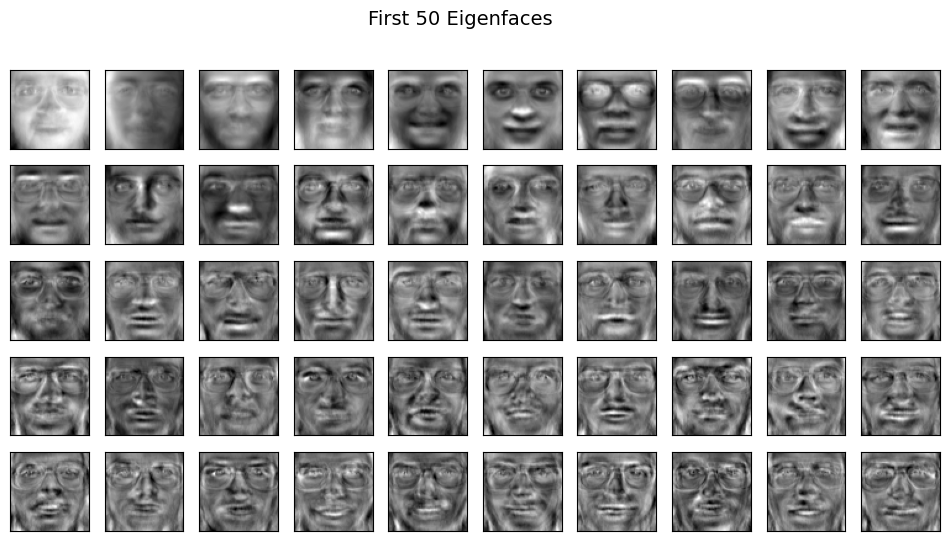

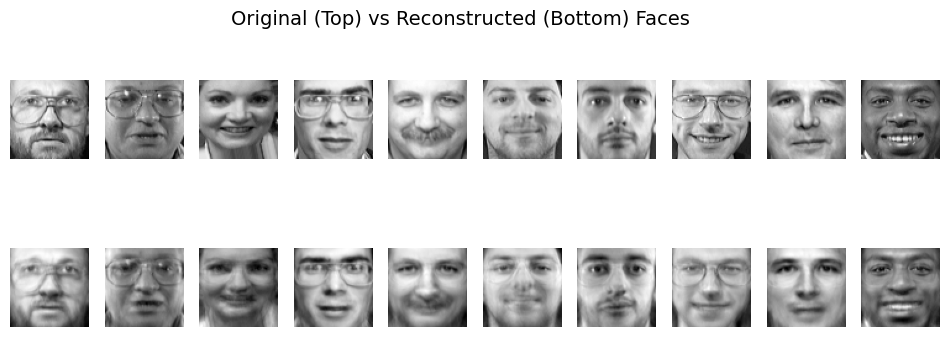

In [2]:
# Get the Eigenfaces (principal components reshaped back to 64x64)
eigenfaces = pca.components_.reshape((n_components, 64, 64))

# Plot the first few Eigenfaces
fig, axes = plt.subplots(5, 10, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
plt.suptitle("First 50 Eigenfaces", fontsize=14)
plt.show()

# Reconstruct faces using a subset of principal components
n_reconstruct = 10  # Number of images to reconstruct
X_reconstructed = pca.inverse_transform(X_pca[:n_reconstruct])

# Plot original and reconstructed faces
fig, axes = plt.subplots(2, n_reconstruct, figsize=(12, 4))
for i in range(n_reconstruct):
    # Original
    axes[0, i].imshow(X[i], cmap="gray")
    axes[0, i].axis("off")
    # Reconstructed
    axes[1, i].imshow(X_reconstructed[i].reshape(64, 64), cmap="gray")
    axes[1, i].axis("off")
plt.suptitle("Original (Top) vs Reconstructed (Bottom) Faces", fontsize=14)
plt.show()